### ИУ5-61Б Павловская А.А. Лаб2 ТМО

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [12]:
data = pd.read_csv('archive/HRDataset_v14.csv')

In [14]:
# размер набора данных
data.shape

(311, 36)

In [15]:
# типы колонок
data.dtypes

Employee_Name                  object
EmpID                         float64
MarriedID                     float64
MaritalStatusID               float64
GenderID                      float64
EmpStatusID                   float64
DeptID                        float64
PerfScoreID                   float64
FromDiversityJobFairID        float64
Salary                        float64
Termd                         float64
PositionID                    float64
Position                       object
State                          object
Zip                           float64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [13]:
# Проверка на пропущенные значения
data.isnull().sum()

Employee_Name                   4
EmpID                           4
MarriedID                       4
MaritalStatusID                 4
GenderID                        4
EmpStatusID                     4
DeptID                          4
PerfScoreID                     4
FromDiversityJobFairID          4
Salary                          4
Termd                           4
PositionID                      4
Position                        4
State                           4
Zip                             4
DOB                             4
Sex                             4
MaritalDesc                     4
CitizenDesc                     4
HispanicLatino                  4
RaceDesc                        4
DateofHire                      4
DateofTermination             211
TermReason                      4
EmploymentStatus                4
Department                      4
ManagerName                     4
ManagerID                      12
RecruitmentSource               4
PerformanceSco

In [16]:
# Первые 5 строк датасета
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,104437.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0
Akinkuolie,Sarah,10196.0,1.0,1.0,0.0,5.0,5.0,3.0,0.0,64955.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3.0,0.0,5/15/2012,0.0,3.0
Alagbe,Trina,10088.0,1.0,1.0,0.0,1.0,5.0,3.0,0.0,64991.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5.0,0.0,1/3/2019,0.0,15.0
Anderson,Carol,10069.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,50825.0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4.0,0.0,2/1/2016,0.0,2.0


In [17]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 311


## Обработка пропусков в данных
### Удаление или заполнение нулями

In [18]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((311, 36), (311, 0))

In [19]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((311, 36), (100, 36))

In [20]:
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,104437.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0
Akinkuolie,Sarah,10196.0,1.0,1.0,0.0,5.0,5.0,3.0,0.0,64955.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3.0,0.0,5/15/2012,0.0,3.0
Alagbe,Trina,10088.0,1.0,1.0,0.0,1.0,5.0,3.0,0.0,64991.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5.0,0.0,1/3/2019,0.0,15.0
Anderson,Carol,10069.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,50825.0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4.0,0.0,2/1/2016,0.0,2.0


In [21]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
Adinolfi,Wilson K,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5.0,0.0,1/17/2019,0.0,1.0
Ait Sidi,Karthikeyan,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,104437.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3.0,6.0,2/24/2016,0.0,17.0
Akinkuolie,Sarah,10196.0,1.0,1.0,0.0,5.0,5.0,3.0,0.0,64955.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3.0,0.0,5/15/2012,0.0,3.0
Alagbe,Trina,10088.0,1.0,1.0,0.0,1.0,5.0,3.0,0.0,64991.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5.0,0.0,1/3/2019,0.0,15.0
Anderson,Carol,10069.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,50825.0,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4.0,0.0,2/1/2016,0.0,2.0


## "Внедрение значений" - импьютация (imputation)
### Обработка пропусков в числовых данных

In [22]:
# Выбор числовых колонок с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка EmpID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка MarriedID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка MaritalStatusID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка GenderID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка EmpStatusID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка DeptID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка PerfScoreID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка FromDiversityJobFairID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка Salary. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка Termd. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка PositionID. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка Zip. Тип данных float64. Количество пустых значений 4, 1.29%.
Колонка ManagerID. Тип данных float64. Количество пустых значений 12, 3.86%.
Колонка 

In [23]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
Adinolfi,10026.0,0.0,0.0,1.0,1.0,5.0,4.0,0.0,62506.0,0.0,19.0,1960.0,22.0,4.60,5.0,0.0,0.0,1.0
Ait Sidi,10084.0,1.0,1.0,1.0,5.0,3.0,3.0,0.0,104437.0,1.0,27.0,2148.0,4.0,4.96,3.0,6.0,0.0,17.0
Akinkuolie,10196.0,1.0,1.0,0.0,5.0,5.0,3.0,0.0,64955.0,1.0,20.0,1810.0,20.0,3.02,3.0,0.0,0.0,3.0
Alagbe,10088.0,1.0,1.0,0.0,1.0,5.0,3.0,0.0,64991.0,0.0,19.0,1886.0,16.0,4.84,5.0,0.0,0.0,15.0
Anderson,10069.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,50825.0,1.0,19.0,2169.0,39.0,5.00,4.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodson,10135.0,0.0,0.0,1.0,1.0,5.0,3.0,0.0,65893.0,0.0,20.0,1810.0,20.0,4.07,4.0,0.0,0.0,13.0
Ybarra,10301.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0,48513.0,1.0,19.0,2458.0,12.0,3.20,2.0,0.0,5.0,4.0
Zamora,10010.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,220450.0,0.0,6.0,2067.0,2.0,4.60,5.0,6.0,0.0,16.0
Zhou,10043.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,89292.0,0.0,9.0,2148.0,4.0,5.00,3.0,5.0,0.0,11.0


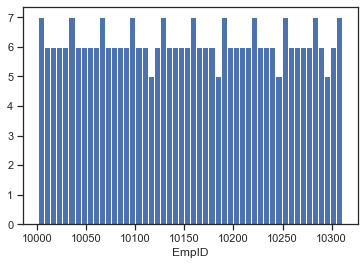

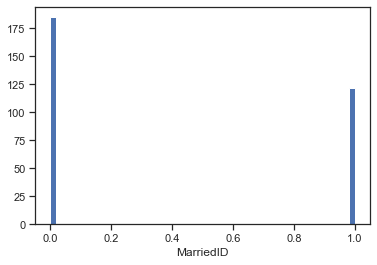

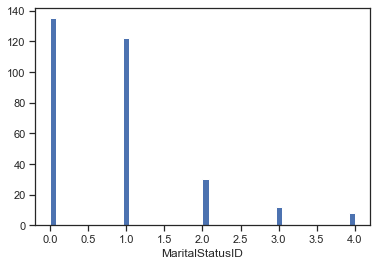

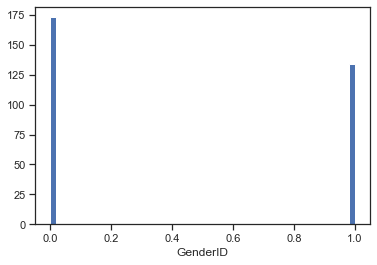

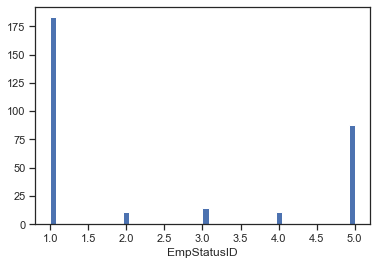

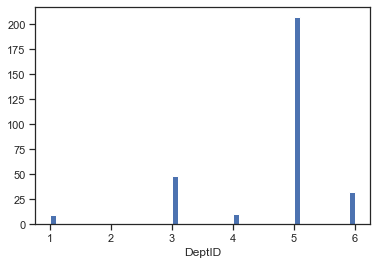

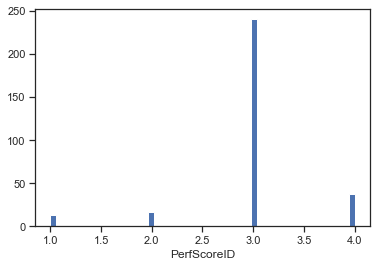

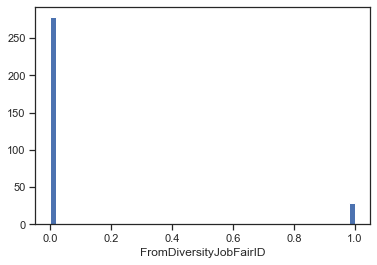

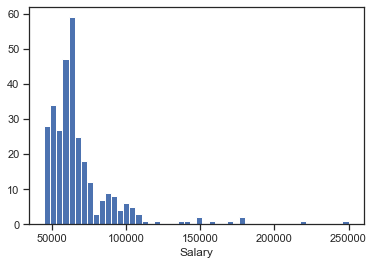

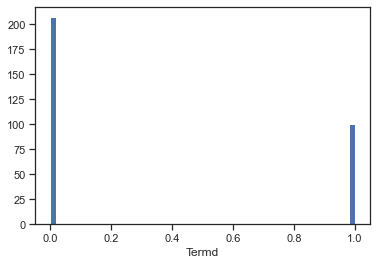

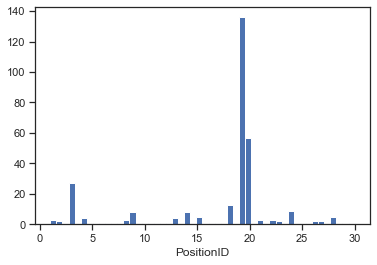

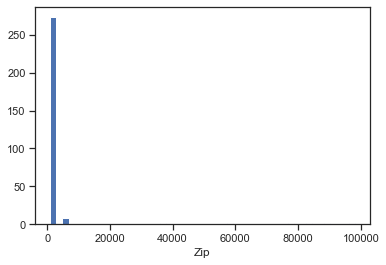

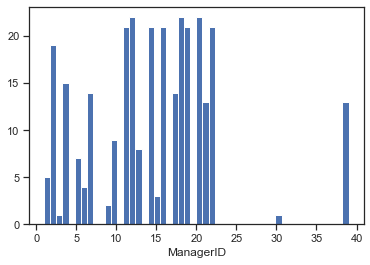

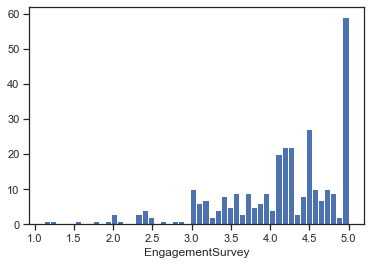

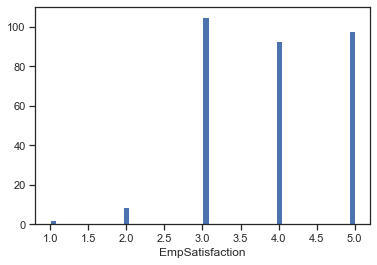

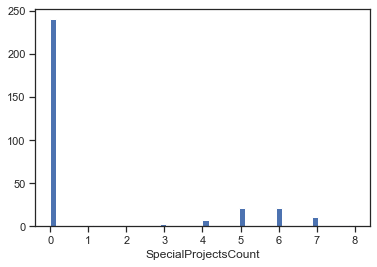

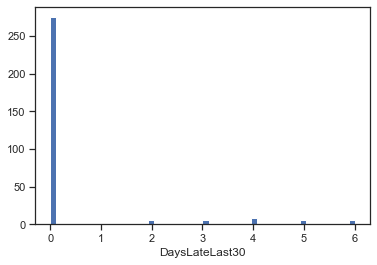

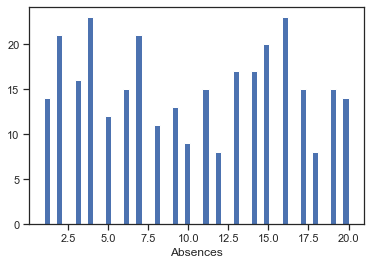

In [24]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [26]:
# Используем встроенные средства импьютации библиотеки scikit-learn
data_num_Absences = data_num[['Absences']]
data_num_Absences.head()

,Absences
Adinolfi,1.0
Ait Sidi,17.0
Akinkuolie,3.0
Alagbe,15.0
Anderson,2.0


In [27]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [28]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Absences)
mask_missing_values_only

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [29]:
# Импьютация различными показателями центра распределения с помощью класса SimpleImputer
strategies=['mean', 'median', 'most_frequent']

In [34]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Absences)
    return data_num_imp[mask_missing_values_only]

In [35]:
# Среднее значение
strategies[0], test_num_impute(strategies[0])

('mean', array([10.22801303, 10.22801303, 10.22801303, 10.22801303]))

In [36]:
# Медиана
strategies[1], test_num_impute(strategies[1])

('median', array([10., 10., 10., 10.]))

In [37]:
# Мода
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([4., 4., 4., 4.]))

In [38]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [39]:
data[['Zip']].describe()

,Zip
count,307.000000
mean,6612.508143
std,17011.083885
min,1013.000000
25%,1895.500000
50%,2132.000000
75%,2355.000000
max,98052.000000


In [40]:
test_num_impute_col(data, 'Zip', strategies[0])

('Zip', 'mean', 4, 6612.508143322476, 6612.508143322476)

In [41]:
test_num_impute_col(data, 'Zip', strategies[1])

('Zip', 'median', 4, 2132.0, 2132.0)

In [42]:
test_num_impute_col(data, 'Zip', strategies[2])

('Zip', 'most_frequent', 4, 1886.0, 1886.0)

### Обработка пропусков в категориальных данных

In [43]:
# Выбор категориальных колонок с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Employee_Name. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка Position. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка State. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка DOB. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка Sex. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка MaritalDesc. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка CitizenDesc. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка HispanicLatino. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка RaceDesc. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка DateofHire. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка DateofTermination. Тип данных object. Количество пустых значений 211, 67.85%.
Колонка TermReason. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка EmploymentStatus. Тип данных object. Количество пустых значений 4, 1.29%.
Колонка De

In [44]:
# Импьютация категориальных признаков со стратегиями 
# "most_frequent" или "constant" с помощью класса SimpleImputer
cat_temp_data = data[['TermReason']]
cat_temp_data.head()

,TermReason
Adinolfi,N/A-StillEmployed
Ait Sidi,career change
Akinkuolie,hours
Alagbe,N/A-StillEmployed
Anderson,return to school


In [45]:
cat_temp_data['TermReason'].unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military', nan,
       'Fatal attraction', 'maternity leave - did not return',
       'medical issues', 'gross misconduct'], dtype=object)

In [46]:
cat_temp_data[cat_temp_data['TermReason'].isnull()].shape

(4, 1)

In [47]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['N/A-StillEmployed'],
       ['career change'],
       ['hours'],
       ['N/A-StillEmployed'],
       ['return to school'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['unhappy'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['attendance'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['performance'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['career change'],
       ['Learned that he is a gangster'],
       ['N/A-StillEmployed'],
       ['retiring'],
       ['Another position'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmploye

In [48]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Another position', 'Fatal attraction',
       'Learned that he is a gangster', 'N/A-StillEmployed', 'attendance',
       'career change', 'gross misconduct', 'hours',
       'maternity leave - did not return', 'medical issues', 'military',
       'more money', 'performance', 'relocation out of area', 'retiring',
       'return to school', 'unhappy'], dtype=object)

In [49]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='N/A')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['N/A-StillEmployed'],
       ['career change'],
       ['hours'],
       ['N/A-StillEmployed'],
       ['return to school'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['unhappy'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['attendance'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['performance'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['career change'],
       ['Learned that he is a gangster'],
       ['N/A-StillEmployed'],
       ['retiring'],
       ['Another position'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmployed'],
       ['Another position'],
       ['N/A-StillEmployed'],
       ['N/A-StillEmploye

In [50]:
np.unique(data_imp3)

array(['Another position', 'Fatal attraction',
       'Learned that he is a gangster', 'N/A', 'N/A-StillEmployed',
       'attendance', 'career change', 'gross misconduct', 'hours',
       'maternity leave - did not return', 'medical issues', 'military',
       'more money', 'performance', 'relocation out of area', 'retiring',
       'return to school', 'unhappy'], dtype=object)

In [52]:
data_imp3[data_imp3=='N/A'].size

4

### Преобразование категориальных признаков в числовые

In [53]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,N/A-StillEmployed
1,career change
2,hours
3,N/A-StillEmployed
4,return to school
...,...
306,N/A-StillEmployed
307,Another position
308,N/A-StillEmployed
309,N/A-StillEmployed


### Кодирование категорий целочисленными значениями - label encoding

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [55]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [56]:
cat_enc['c1'].unique()

array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'Fatal attraction', 'maternity leave - did not return',
       'medical issues', 'gross misconduct'], dtype=object)

In [57]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [58]:
le.inverse_transform([0, 1, 2, 3])

array(['Another position', 'Fatal attraction',
       'Learned that he is a gangster', 'N/A-StillEmployed'], dtype=object)

### Кодирование категорий наборами бинарных значений - one-hot encoding

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [60]:
cat_enc.shape

(311, 1)

In [61]:
cat_enc_ohe.shape

(311, 17)

In [62]:
cat_enc_ohe

<311x17 sparse matrix of type '<class 'numpy.float64'>'
	with 311 stored elements in Compressed Sparse Row format>

In [63]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0.]])

In [64]:
cat_enc.head(10)

,c1
0,N/A-StillEmployed
1,career change
2,hours
3,N/A-StillEmployed
4,return to school
5,N/A-StillEmployed
6,N/A-StillEmployed
7,N/A-StillEmployed
8,N/A-StillEmployed
9,N/A-StillEmployed


### Pandas get_dummies - быстрый вариант one-hot кодирования

In [65]:
pd.get_dummies(cat_enc).head()

,c1_Another position,c1_Fatal attraction,c1_Learned that he is a gangster,c1_N/A-StillEmployed,c1_attendance,c1_career change,c1_gross misconduct,c1_hours,c1_maternity leave - did not return,c1_medical issues,c1_military,c1_more money,c1_performance,c1_relocation out of area,c1_retiring,c1_return to school,c1_unhappy
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,TermReason_Another position,TermReason_Fatal attraction,TermReason_Learned that he is a gangster,TermReason_N/A-StillEmployed,TermReason_attendance,TermReason_career change,TermReason_gross misconduct,TermReason_hours,TermReason_maternity leave - did not return,TermReason_medical issues,TermReason_military,TermReason_more money,TermReason_performance,TermReason_relocation out of area,TermReason_retiring,TermReason_return to school,TermReason_unhappy,TermReason_nan
Adinolfi,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ait Sidi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Akinkuolie,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Alagbe,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## Масштабирование данных

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

### MinMax Масштабирование

In [73]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Salary']])

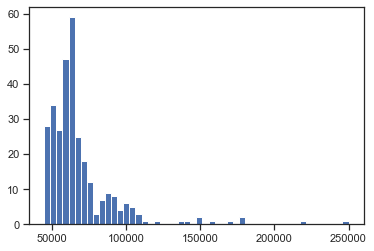

In [74]:
plt.hist(data['Salary'], 50)
plt.show()

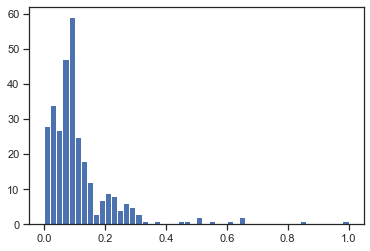

In [75]:
plt.hist(sc1_data, 50)
plt.show()

### Масштабирование данных на основе Z-оценки - StandardScaler

In [76]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Salary']])

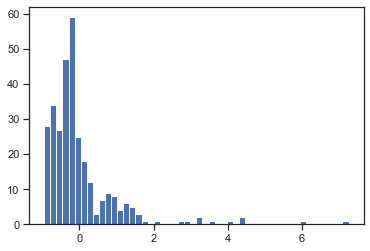

In [77]:
plt.hist(sc2_data, 50)
plt.show()